 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [253]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [254]:
#read whale returns
whale_returns = Path('whale_returns.csv')
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\770737897.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [255]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [256]:
# Drop nulls 
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [257]:
# Reading algorithmic returns
algo_returns = Path('algo_returns.csv')
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\4069526688.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [258]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [259]:
# Drop nulls

algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [260]:
# Reading S&P 500 Closing Prices
sp500_history = Path('sp500_history.csv')

sp500_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\3416864151.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\3416864151.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [261]:
# Fix Data Types
# drop "$" from sp500 DF

sp500_df['Close'] = pd.to_numeric(sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float))
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [262]:
# Drop nulls
sp500_df.isnull().sum()
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [263]:
sp500_df.dropna(inplace=True)
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [264]:
# Calculate Daily Returns
#convert "close"  column to daily returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [265]:
# concat the dataframes together
returns_df = pd.concat([whale_df, algo_df, sp500_df], axis=1, join='inner')

returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [266]:
# Rename the 'close' column to 'SP500'
returns_df = returns_df.rename(columns={'Close': 'SP500'})
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

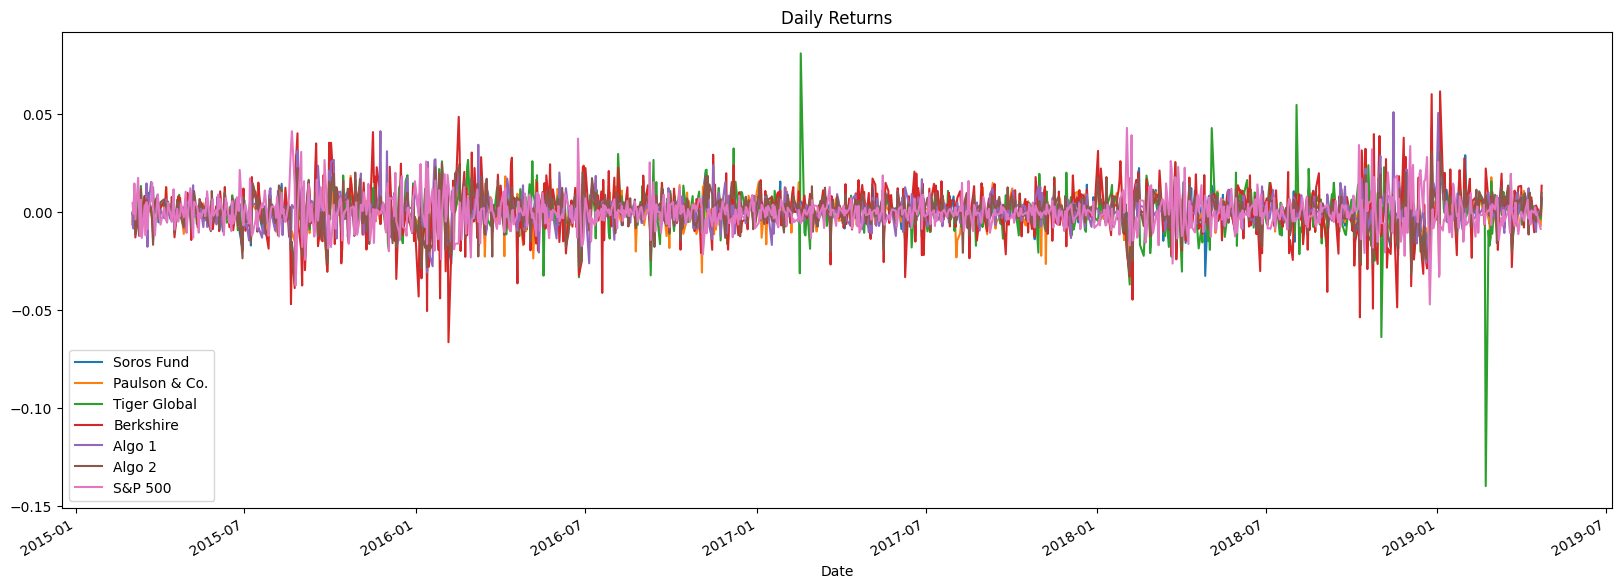

In [267]:
#plot daily returns

returns_df.columns = ['Soros Fund', 'Paulson & Co.', 'Tiger Global', 'Berkshire', 'Algo 1', 'Algo 2','S&P 500']
returns_df.plot(figsize=(20,7), title='Daily Returns');

#### Calculate and Plot cumulative returns.

In [268]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_df).cumprod()
cumulative_returns.head()

,Soros Fund,Paulson & Co.,Tiger Global,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


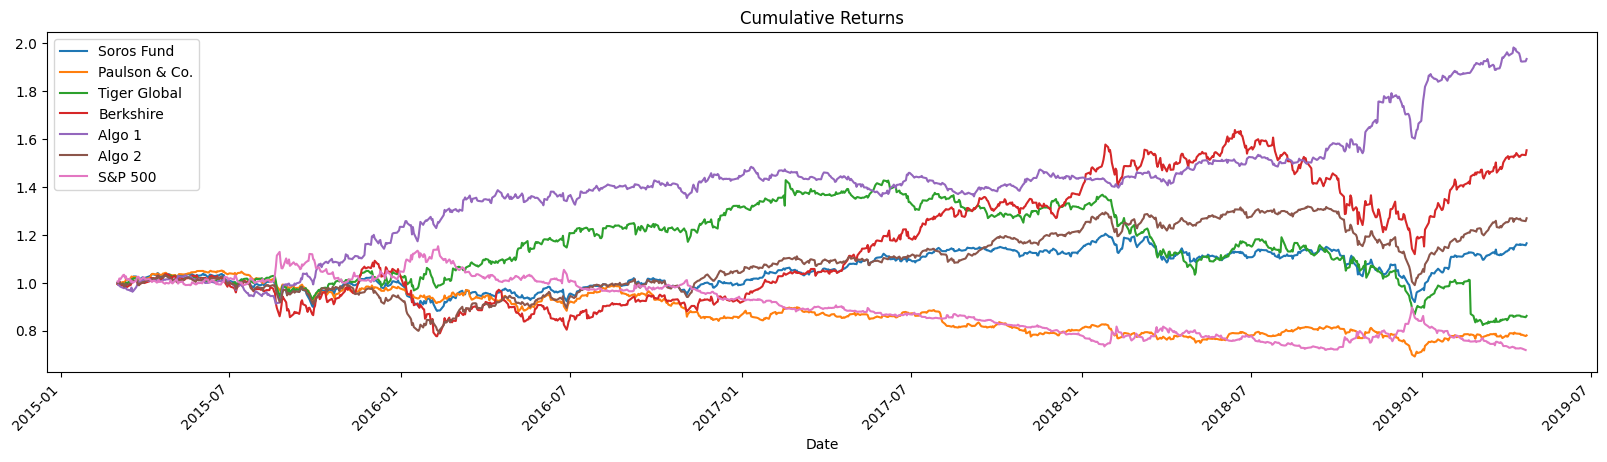

In [269]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,5), rot=45, title='Cumulative Returns');


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


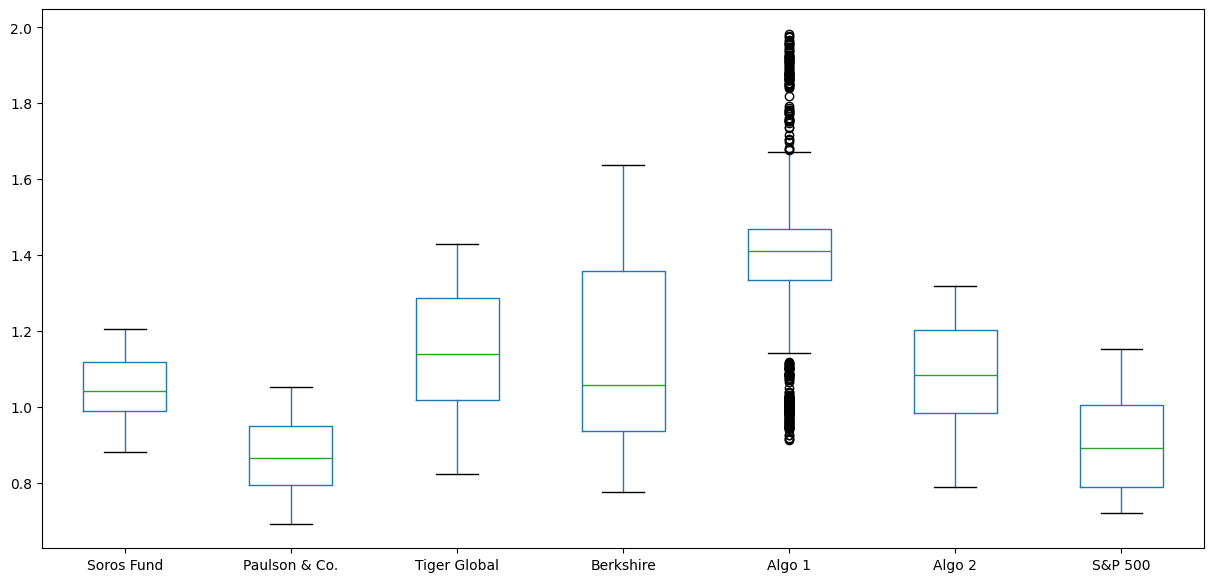

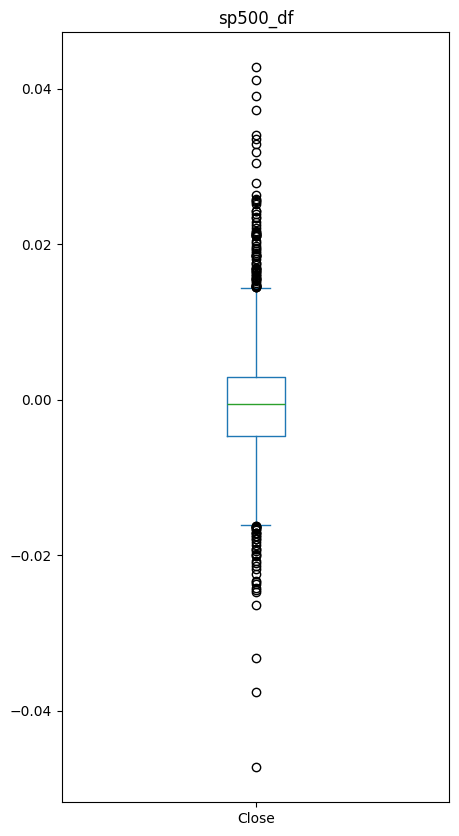

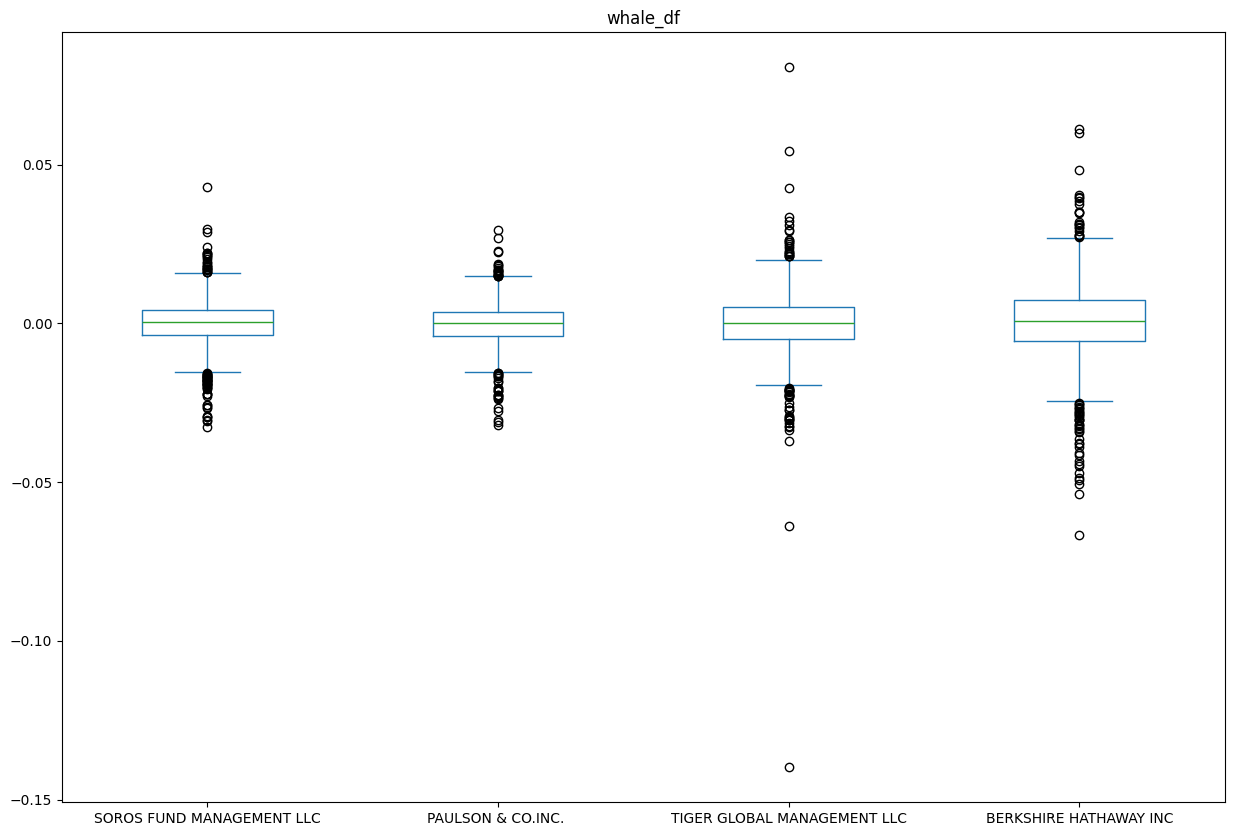

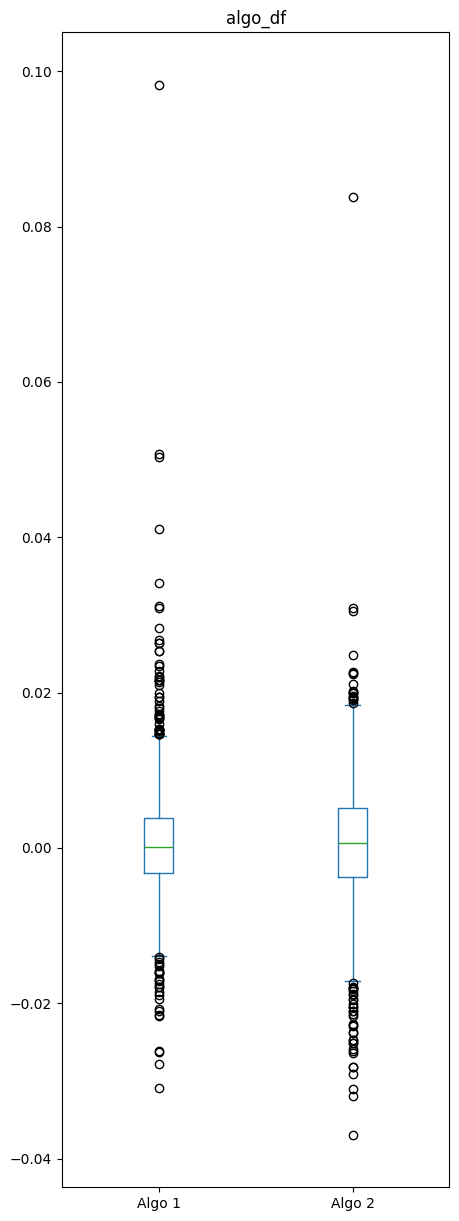

In [270]:
# Box plot to visually show risk
cumulative_returns.columns = ['Soros Fund', 'Paulson & Co.', 'Tiger Global', 'Berkshire', 'Algo 1', 'Algo 2','S&P 500']
cumulative_returns.boxplot(figsize=(15,7), grid=False)
sp500_df.plot.box(figsize=(5,10), title='sp500_df')
whale_df.plot.box(figsize=(15,10), title='whale_df')
algo_df.plot.box(figsize=(5,15,), title='algo_df');

### Calculate Standard Deviations

In [271]:
# Calculate the daily standard deviations of all portfolios
cum_returns_std = cumulative_returns.std().sort_values(ascending=True)
cum_returns_std

Soros Fund       0.073238
Paulson & Co.    0.088455
S&P 500          0.114846
Algo 2           0.131700
Tiger Global     0.149844
Algo 1           0.232277
Berkshire        0.241575
dtype: float64

### Determine which portfolios are riskier than the S&P 500

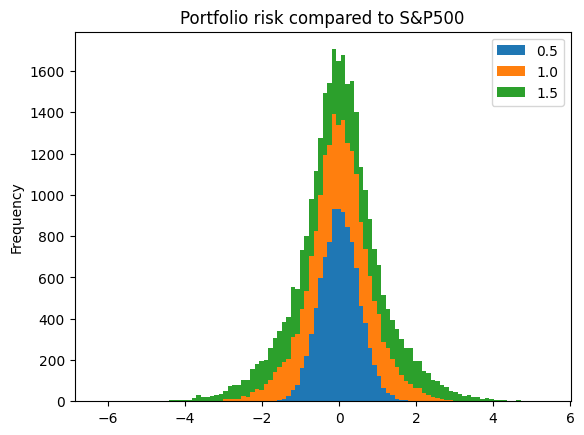

In [272]:
# Determine which portfolios are riskier than the S&P 500

sp500_df = np.random.normal(scale=0.5, size=10000)
algo_df = np.random.normal(scale=1.0, size=10000)
whale_df = np.random.normal(scale=1.5, size=10000)

cum_returns_std = pd.DataFrame({
    "0.5": sp500_df,
    "1.0": algo_df,
    "1.5": whale_df
})

cum_returns_std.plot.hist(stacked=True, bins=100, title='Portfolio risk compared to S&P500');

### Calculate the Annualized Standard Deviation

In [273]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = round(cumulative_returns * np.sqrt(252), 2)
annualized_std

,Soros Fund,Paulson & Co.,Tiger Global,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,15.85,15.80,15.87,15.77,15.84,15.86,15.94
2015-03-04,15.89,15.85,15.83,15.84,15.71,15.90,15.93
2015-03-05,15.95,15.91,15.86,15.94,15.69,15.97,16.15
2015-03-06,15.83,15.85,15.73,15.73,15.61,15.78,16.09
2015-03-09,15.84,15.92,15.82,15.71,15.53,15.80,16.37
...,...,...,...,...,...,...,...
2019-04-16,18.43,12.49,13.69,24.24,30.88,20.13,11.54
2019-04-17,18.38,12.41,13.62,24.32,30.56,20.02,11.52
2019-04-18,18.40,12.42,13.63,24.36,30.54,20.00,11.51


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

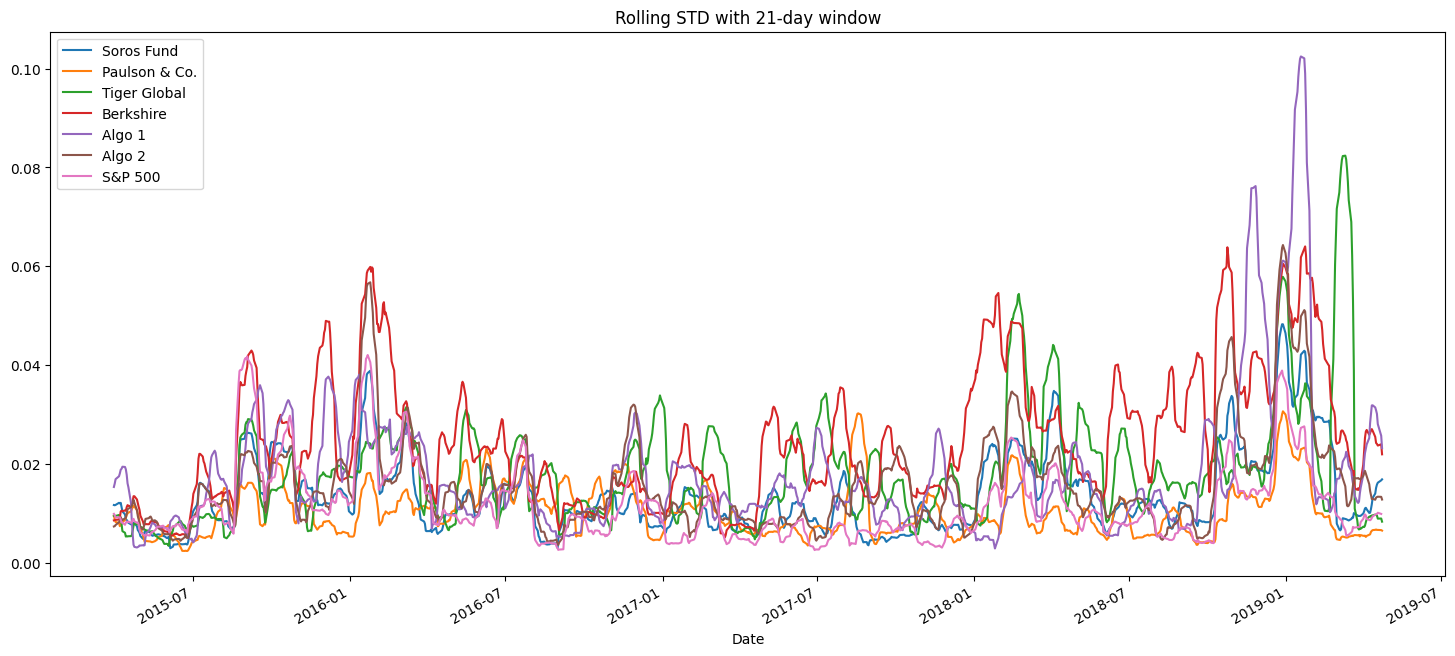

In [274]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and plot
rolling_std = cumulative_returns.rolling(window=21).std().plot(figsize=(18,8), title='Rolling STD with 21-day window');
rolling_std;

### Calculate and plot the correlation

<Axes: >

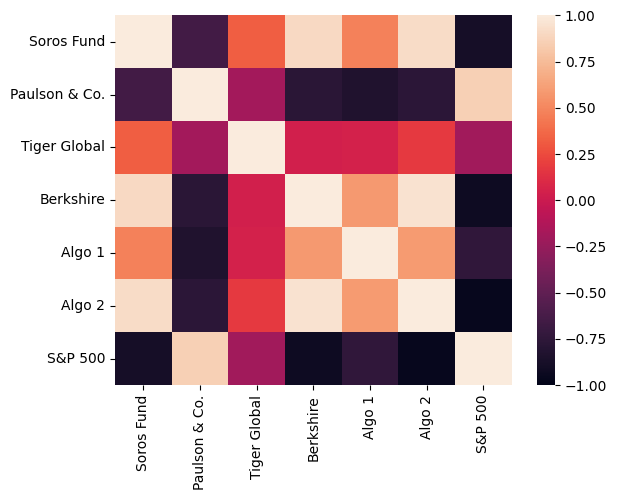

In [275]:
# Calculate the correlation
price_correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [276]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 1'].cov(cumulative_returns['S&P 500'])
covariance

-0.019775435384048825

In [277]:
# Calculate variance of S&P 500
variance = cumulative_returns['S&P 500'].var()
variance


0.01318961312579499

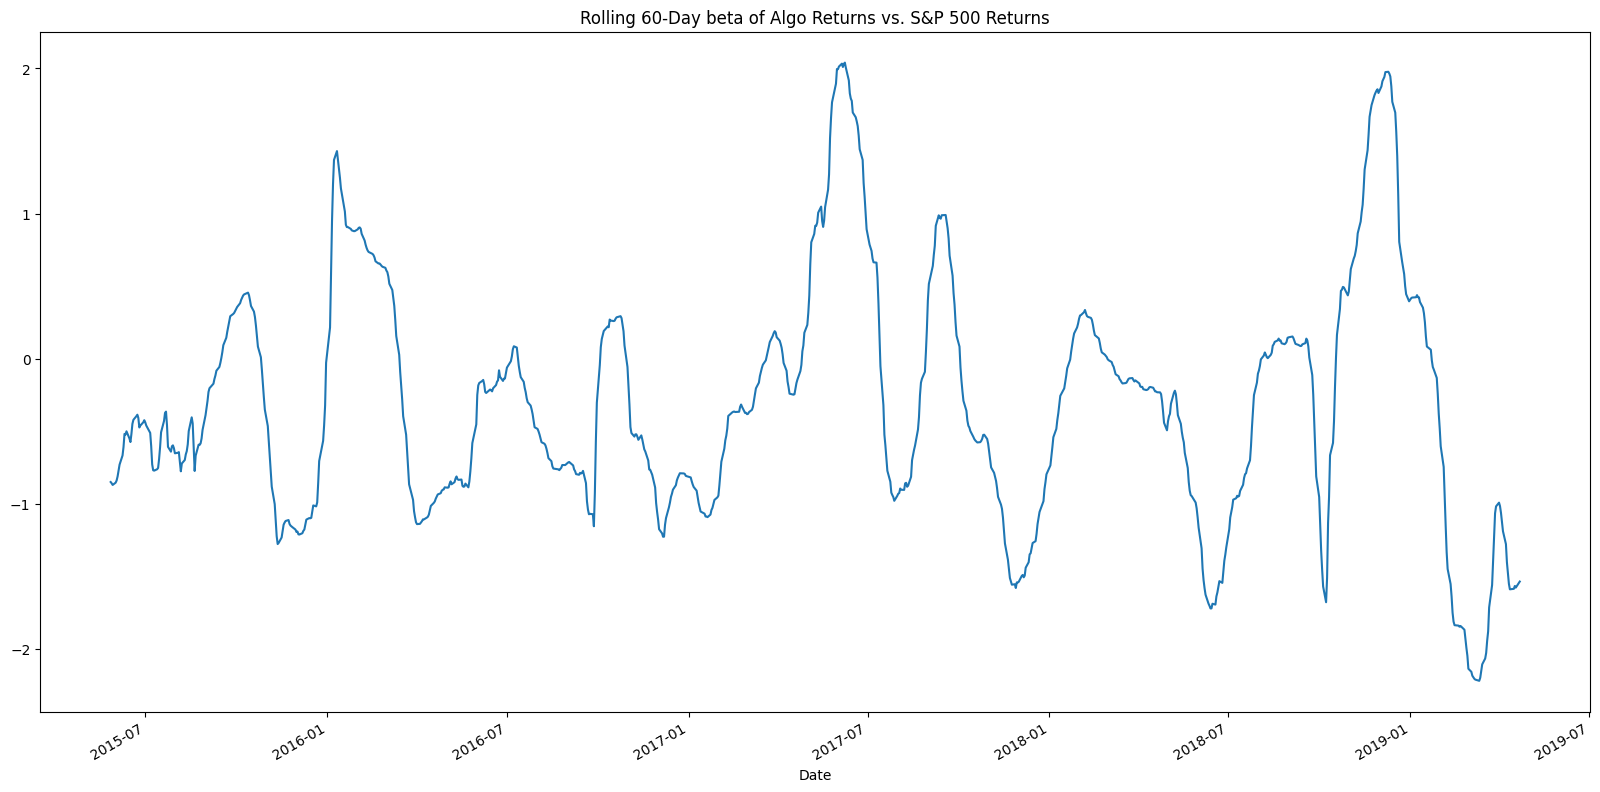

In [278]:
# Computing beta
beta = covariance / variance
beta

rolling_beta = cumulative_returns['Algo 1'].rolling(window=60).cov(cumulative_returns['S&P 500']).\
    div(cumulative_returns['S&P 500'].rolling(window=60).var())

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day beta of Algo Returns vs. S&P 500 Returns');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [279]:
# Use `ewm` to calculate the rolling window
rolling_ewm = rolling_beta.ewm(halflife=21).mean().dropna()
rolling_ewm

Date
2015-05-27   -0.850564
2015-05-28   -0.854879
2015-05-29   -0.860318
2015-06-01   -0.858957
2015-06-02   -0.854993
                ...   
2019-04-16   -1.225836
2019-04-17   -1.236916
2019-04-18   -1.247995
2019-04-22   -1.257362
2019-04-23   -1.257362
Length: 984, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [280]:
# Annualized Sharpe Ratios
sharpe_ratio = ((returns_df.mean() - returns_df['S&P 500'].mean()) * 252) / (returns_df.std() * np.sqrt(252))

sharpe_ratio

Soros Fund       0.920419
Paulson & Co.    0.150484
Tiger Global     0.287699
Berkshire        0.966507
Algo 1           1.963017
Algo 2           1.035152
S&P 500          0.000000
dtype: float64

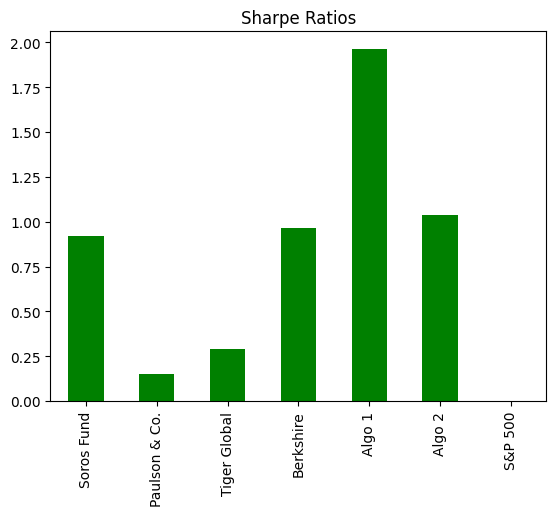

In [281]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',  title="Sharpe Ratios", color='green');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the calculated Sharpe ratios, both Algo 1 and Algo 2 strategies appear to outperform both the market (S&P 500) and the whale portfolios, in terms of providing potentially better risk-adjusted returns.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [282]:
# Reading data from 1st stock "APPLE"
apple = Path('apple_prices.csv')
apple = pd.read_csv(apple, index_col='Date', parse_dates=True, infer_datetime_format=True)
apple.tail()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\1103140789.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple = pd.read_csv(apple, index_col='Date', parse_dates=True, infer_datetime_format=True)


,Close
Date,
2022-11-17 16:00:00,150.72
2022-11-18 16:00:00,151.29
2022-11-21 16:00:00,148.01
2022-11-22 16:00:00,150.18
2022-11-23 16:00:00,151.07


In [283]:
# Reading data from 2nd stock "TESLA"
google = Path('google_prices.csv')
google = pd.read_csv(google, index_col='Date', parse_dates=True, infer_datetime_format=True)
google.tail()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\456301286.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google = pd.read_csv(google, index_col='Date', parse_dates=True, infer_datetime_format=True)


,Close
Date,
2022-11-17 16:00:00,98.50
2022-11-18 16:00:00,97.80
2022-11-21 16:00:00,95.83
2022-11-22 16:00:00,97.33
2022-11-23 16:00:00,98.82


In [284]:
# Reading data from 3rd stock "NVIDIA"
nvda = Path('NVDA_prices.csv')
nvda = pd.read_csv(nvda, index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda.tail()

C:\Users\0xdaom\AppData\Local\Temp\ipykernel_25328\3645641792.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda = pd.read_csv(nvda, index_col='Date', parse_dates=True, infer_datetime_format=True)


,Close
Date,
2022-11-18 16:00:00,154.09
2022-11-21 16:00:00,153.17
2022-11-22 16:00:00,160.38
2022-11-23 16:00:00,165.19
2022-11-25 13:05:00,162.70


In [285]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([apple,google,nvda], axis=1, keys=['Apple', 'Google', 'NVDA']).dropna()
# Drop the 'Close' keys from the columns
combined_stocks_df.columns = combined_stocks_df.columns.droplevel(1)
combined_stocks_df

,Apple,Google,NVDA
Date,,,
2017-11-27 16:00:00,43.52,52.71,53.54
2017-11-28 16:00:00,43.27,52.37,52.68
2017-11-29 16:00:00,42.37,51.08,49.11
2017-11-30 16:00:00,42.96,51.07,50.18
2017-12-01 16:00:00,42.76,50.51,49.42
...,...,...,...
2022-11-17 16:00:00,150.72,98.50,156.77
2022-11-18 16:00:00,151.29,97.80,154.09
2022-11-21 16:00:00,148.01,95.83,153.17


In [286]:
# Reset date index to drop time stamp
combined_stocks_df.index = pd.to_datetime(combined_stocks_df.index)
combined_stocks_df.index = combined_stocks_df.index.date
combined_stocks_df


,Apple,Google,NVDA
2017-11-27,43.52,52.71,53.54
2017-11-28,43.27,52.37,52.68
2017-11-29,42.37,51.08,49.11
2017-11-30,42.96,51.07,50.18
2017-12-01,42.76,50.51,49.42
...,...,...,...
2022-11-17,150.72,98.50,156.77
2022-11-18,151.29,97.80,154.09
2022-11-21,148.01,95.83,153.17
2022-11-22,150.18,97.33,160.38


In [287]:
# Calculate daily returns # Drop NAs
my_stock_daily_returns = combined_stocks_df.pct_change().dropna()

# Display sample data
my_stock_daily_returns

,Apple,Google,NVDA
2017-11-28,-0.005744,-0.006450,-0.016063
2017-11-29,-0.020800,-0.024632,-0.067768
2017-11-30,0.013925,-0.000196,0.021788
2017-12-01,-0.004655,-0.010965,-0.015145
2017-12-04,-0.007250,-0.011483,-0.055645
...,...,...,...
2022-11-17,0.012971,-0.004950,-0.014645
2022-11-18,0.003782,-0.007107,-0.017095
2022-11-21,-0.021680,-0.020143,-0.005971
2022-11-22,0.014661,0.015653,0.047072


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

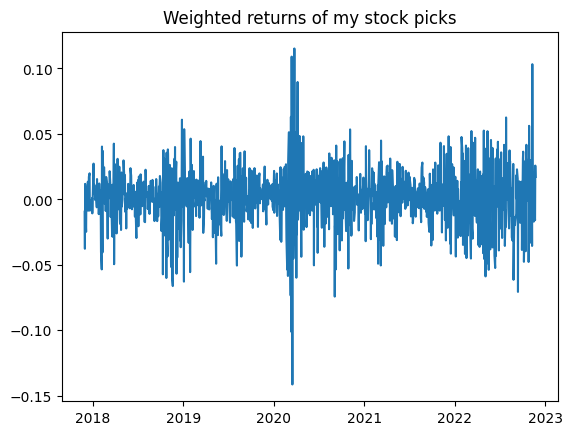

In [288]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_weighted_returns = my_stock_daily_returns.dot(weights)
# Display sample data
stock_weighted_returns.plot(title='Weighted returns of my stock picks');

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [289]:
#join both dfs by adding 'mystock picks column'
returns_df['My stock picks'] = stock_weighted_returns
all_portfolios = returns_df
all_portfolios

,Soros Fund,Paulson & Co.,Tiger Global,Berkshire,Algo 1,Algo 2,S&P 500,My stock picks
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.007918
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.007361
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.000461


In [290]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace = True)
all_portfolios

,Soros Fund,Paulson & Co.,Tiger Global,Berkshire,Algo 1,Algo 2,S&P 500,My stock picks
Date,,,,,,,,
2017-11-28,0.008112,0.001833,-0.002063,0.002527,-0.003334,0.007446,0.000369,-0.009419
2017-11-29,0.001309,0.003533,0.019918,-0.017637,-0.000707,0.001267,-0.008124,-0.037733
2017-11-30,0.000845,-0.004038,0.004975,0.001692,0.006370,0.000850,0.002029,0.011839
2017-12-01,0.005809,0.001531,-0.001728,-0.003915,0.003577,-0.002001,0.001053,-0.010255
2017-12-04,-0.006967,-0.004668,0.007474,-0.012990,-0.013438,0.002550,0.003753,-0.024793
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.007729
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.007918
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.007361


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [291]:
# Calculate the annualized `std`
all_portfolios_std = all_portfolios.std()
annulized_std = all_portfolios_std * np.sqrt(252)
annualized_std

,Soros Fund,Paulson & Co.,Tiger Global,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,15.85,15.80,15.87,15.77,15.84,15.86,15.94
2015-03-04,15.89,15.85,15.83,15.84,15.71,15.90,15.93
2015-03-05,15.95,15.91,15.86,15.94,15.69,15.97,16.15
2015-03-06,15.83,15.85,15.73,15.73,15.61,15.78,16.09
2015-03-09,15.84,15.92,15.82,15.71,15.53,15.80,16.37
...,...,...,...,...,...,...,...
2019-04-16,18.43,12.49,13.69,24.24,30.88,20.13,11.54
2019-04-17,18.38,12.41,13.62,24.32,30.56,20.02,11.52
2019-04-18,18.40,12.42,13.63,24.36,30.54,20.00,11.51


### Calculate and plot rolling `std` with 21-day window

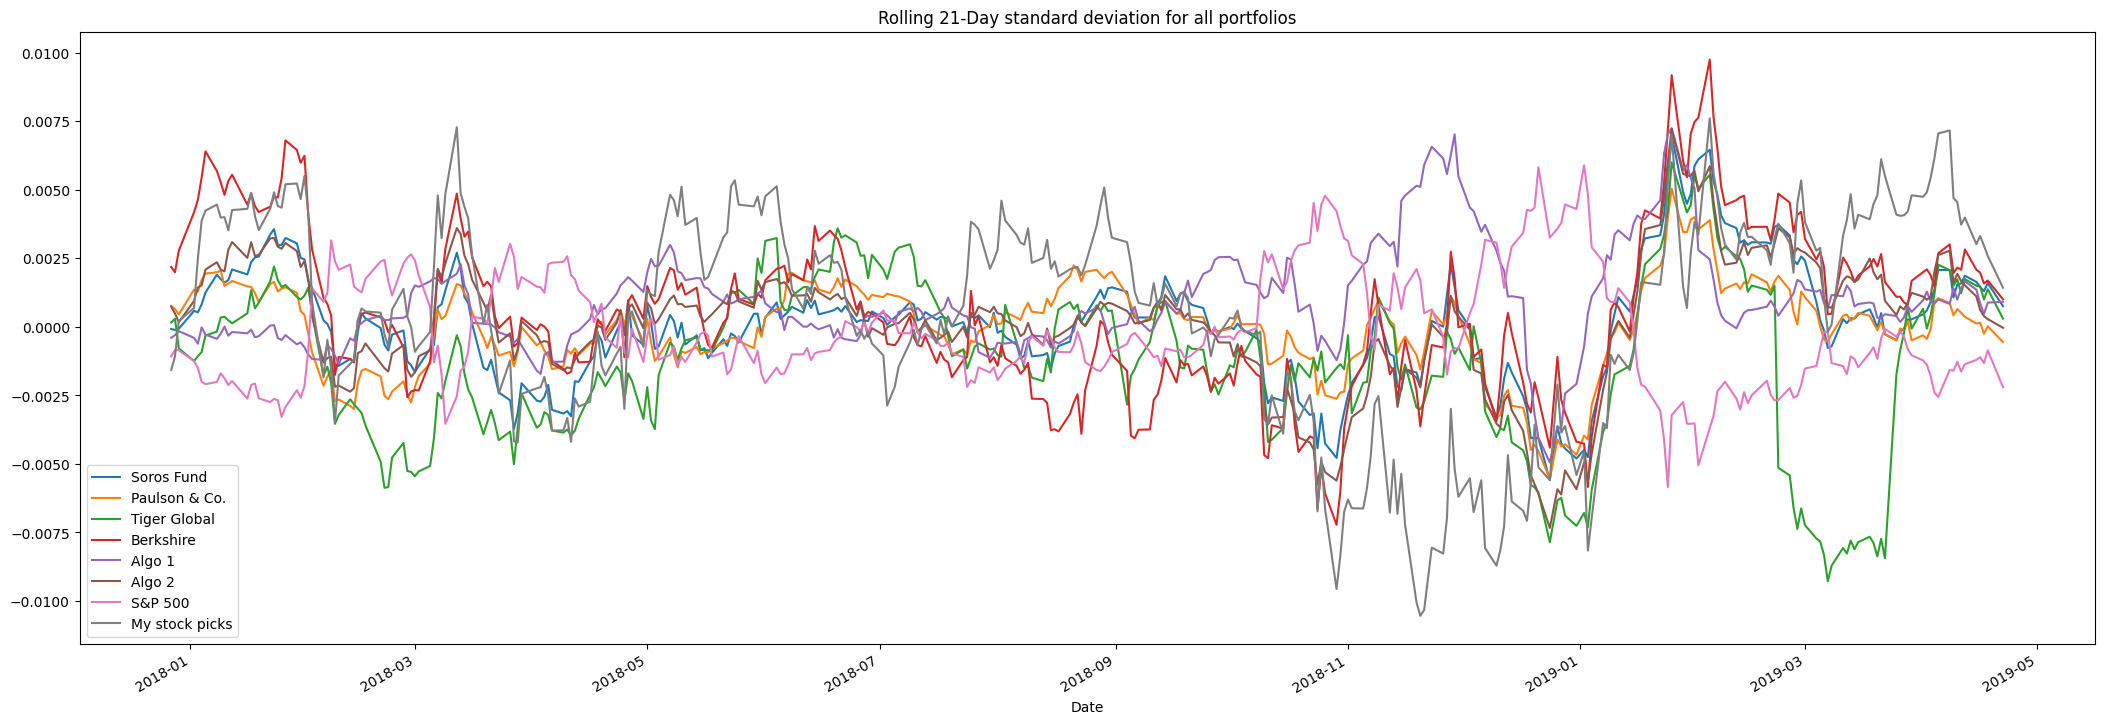

In [292]:
# Calculate rolling standard deviation
all_portfolios_rolling_std = all_portfolios.rolling(window=21).mean()
# Plot rolling standard deviation
all_portfolios_rolling_std.plot(figsize=(26, 9), title='Rolling 21-Day standard deviation for all portfolios');

### Calculate and plot the correlation

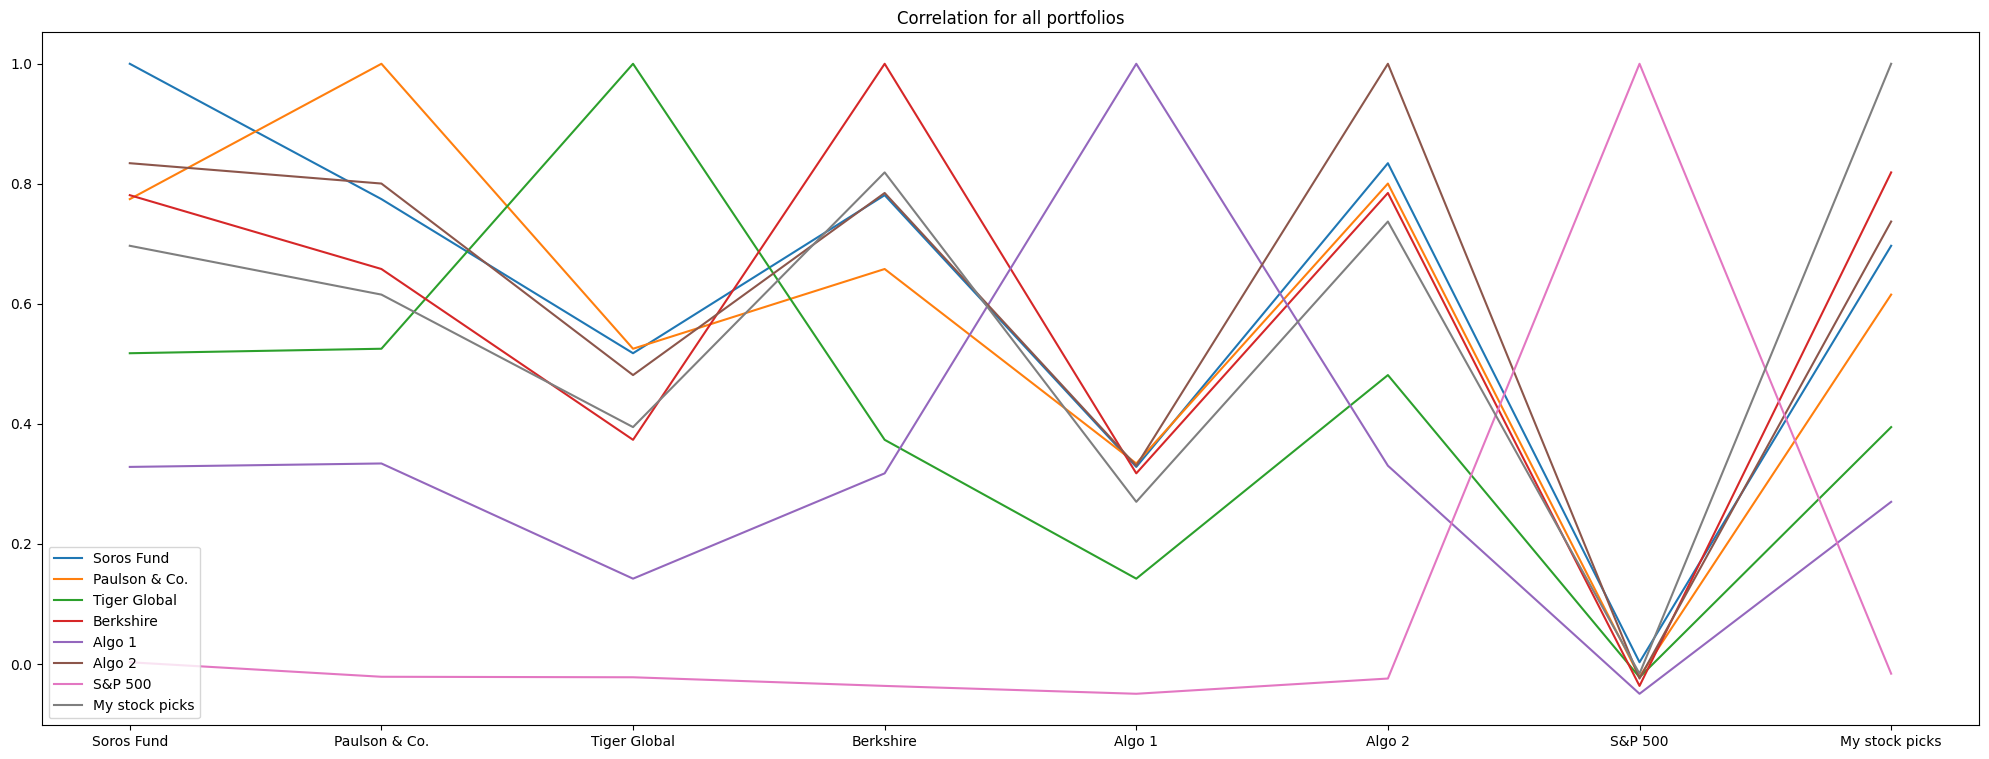

In [293]:
# Calculate and plot the correlation
all_correlation = all_portfolios.corr()
all_correlation.plot(figsize=(25, 9), title='Correlation for all portfolios');

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

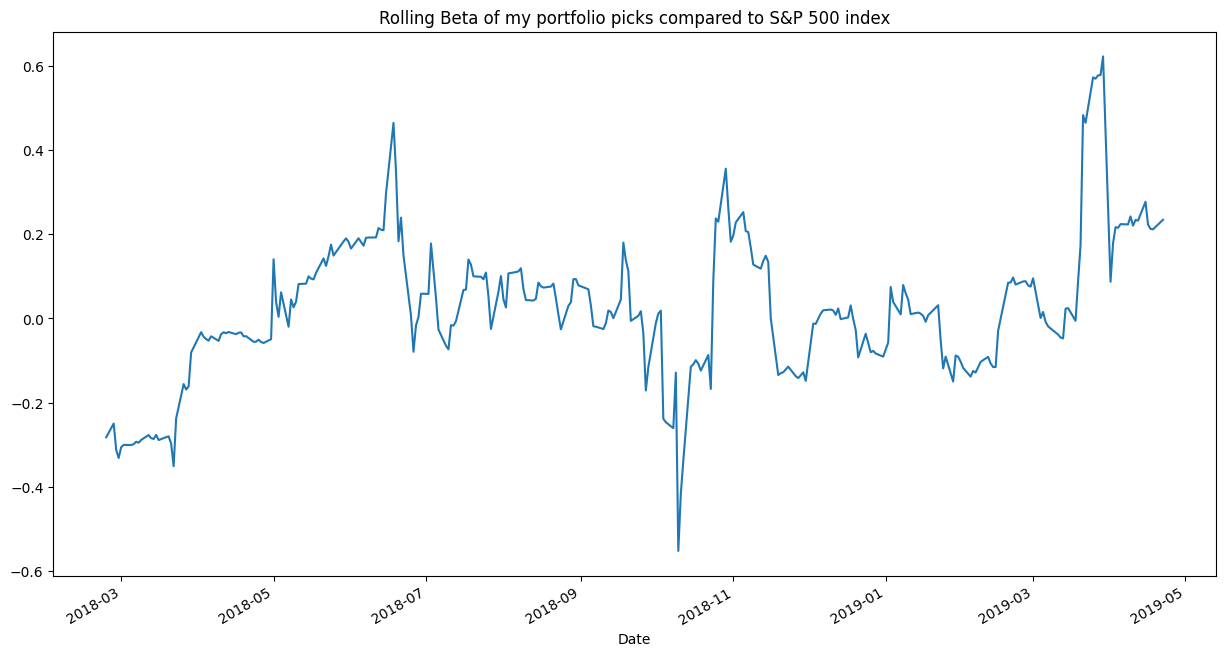

In [294]:
# Calculate and plot Beta
all_covariance = all_portfolios['My stock picks'].rolling(window=60).cov(all_portfolios['S&P 500'])
all_variance = all_portfolios['S&P 500'].rolling(window=60).var()

all_portfolios_rolling_beta = all_covariance / all_variance
all_portfolios_rolling_beta.plot(figsize=(15, 8), title='Rolling Beta of my portfolio picks compared to S&P 500 index');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [295]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolios.mean() - all_portfolios['S&P 500'].mean()) * 252) / (all_portfolios.std() * np.sqrt(252))

Soros Fund        0.665623
Paulson & Co.     0.547376
Tiger Global     -0.995993
Berkshire         0.902724
Algo 1            2.333289
Algo 2            0.824295
S&P 500           0.000000
My stock picks    0.610492
dtype: float64

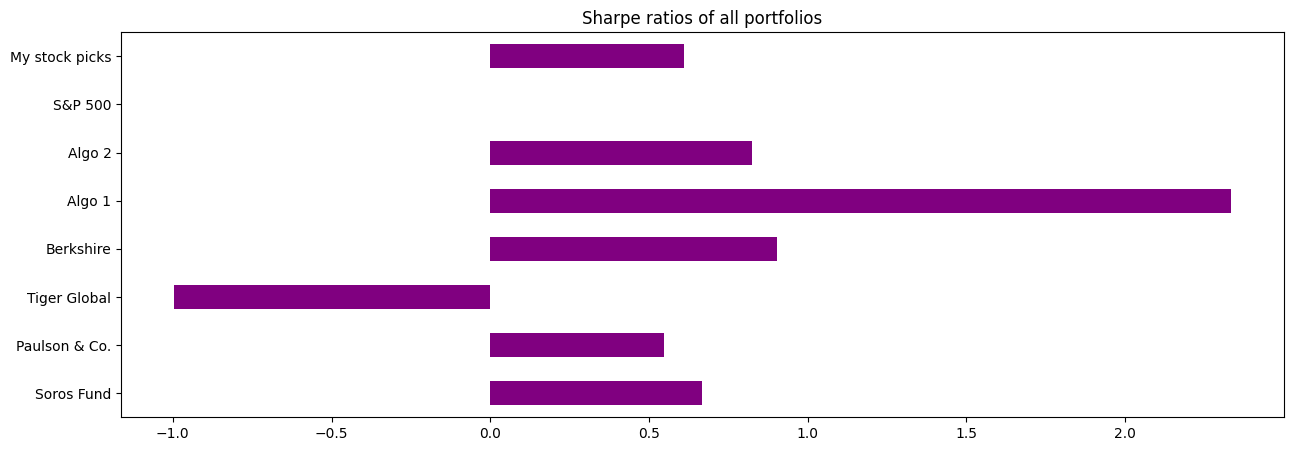

In [296]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='barh', title='Sharpe ratios of all portfolios',figsize=(15,5), color='purple')
sharpe_ratios

### Final Analysis
|*Portfolio*         |*Sharpe Ratio*   |
|-------------------|----------------|
| Soros Fund        | 0.665623       |
| Paulson & Co.     | 0.547376       |
| Tiger Global      | -0.995993      |
| Berkshire         | 0.902724       |
| Algo 1            | 2.333289       |
| Algo 2            | 0.824295       |
| S&P 500           | 0.000000       |
| **My Stock Picks**    | **0.610492**       |



**Performance:**
- My Stock Picks (APPLE, NVDIA, GOOGLE) demonstrated a Sharpe ratio of 0.610492, performing favorably compared to Tiger Global (-0.995993) but trailing behind top performers like Algo 1 (2.333289) and Berkshire (0.902724).

**Risk:**
- While my stock picks provided positive risk-adjusted returns, but fell short of the high returns seen in Algo 1 (2.333289).
- My Stock Picks showcased lower risk compared to Algo 1, making it a more balanced choice despite being centered around technology stocks only, but still exhibited more risk than portfolios with higher Sharpe ratios.

**Conclusion:**
In the context of risk-adjusted returns, My Stock Picks presented a respectable performance, offering positive returns relative to risk. It outperformed certain portfolios but lagged behind the top performers. The choice of My Stock Picks as an investment option may be suitable for those seeking a balanced mix of return and risk, aligning with moderate risk tolerance and investment objectives.
